<a href="https://colab.research.google.com/github/TNBL265/10.014_PokerTripleTriad/blob/main/Python_1D_F10_G07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Project is contributed by:

Tran Nguyen Bao Long 1005227 (Project Manager + Code review +  Documentation)

Nam Hayul 1005611 (Display functions)

Ten Wei Lin 1005444 (Common game logic)

Aida Natasha Binte Nor Azahar 1005367 (Player class)

Eugene Hoong 1005180 (Comparison logic)


This game is inspired by Final Fantasy's game of Triple Triads.

It is a win-by-most-count game (in this case, in the number of cards owned by you at the end of the game.)

With a 3 by 3 grid, the challenge is to win over your opponent's cards by powering over the number listed at its directly opposing edge.

(e.g. With your card on the right of an opponent's card, your left-edge power must be greater than its right-edge power) (Shown by the comparison at turn 2 in the picture below)

To a certain degree it requires some strategy, for the opponent can bite if you expose a weak edge, thus the aim is to ensure that you do not mindlessly allow an opening where the opponent can steal your card and by avalanche of flips, and thereby lose the game.

This game is scalable in terms of coding as it allows for extensive comparison logic to be conducted. Some examples can be that even if you are cornered by 2 powering opponent cards, if the sum of each competing sides (perhaps, your right 4 vs its left 6 AND your top 2 vs other's bottom 8, which in both scenarios adds up to 10 each), you win instead by capitalising on a PLUS COMBO if 2 or more competing sides match by their sums.

Hope you enjoy trying out the game!


# Schematic of the Game Play:

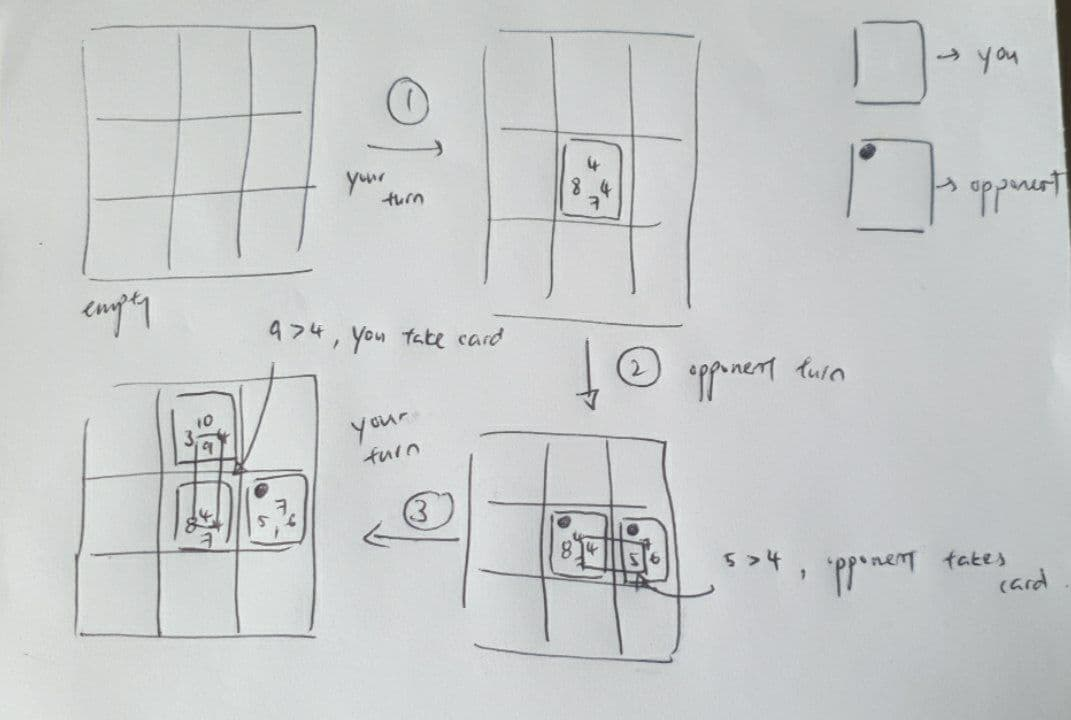

In [9]:
# External library
import random

# Import local functions
# Common game logic functions
from common_game_logic import pause, create_board, coin_toss
from common_game_logic import place_card, check_empty_cell, tabulate

# Triple-Triad Comparison Logic function
from comparison_logic import update_owner

# Display functions
from display import card_display, show_board

# Player class
from player import Player

In [6]:
def main():
  # some constants
  num_cards = 5;
  N = 3 # board dimension

  # Initiate first player:
  p1_name = input("Your name: ")
  diff_lv = input("Choose your difficulty level: EASY, MEDIUM or HARD: ")
  # Convert all input to uppercase (more user friendly)
  diff_lv = diff_lv.upper()

  # Create player Class
  p1 = Player(p1_name, num_cards, diff_lv, N)
  # Create random hand based on selected difficulty
  p1.generate_hand()

  # Second player: (NPC, difficulty level is capped at MEDIUM)
  p2_name = "NPC"
  p2 = Player(p2_name, num_cards, "MEDIUM", N)
  p2.generate_hand()
  # List of card's key that NPC can randomly choose to play
  NPC_cards = list(range(1, num_cards+1))

  # Start game
  board = create_board(N)
  # randomly choose starting/current player 
  first_p = coin_toss(p1, p2)
  
  # Create a list for easy iteration
  # player_list[0] is first player; player_list[1] is second player
  if first_p is p2:
    player_list = [p2, p1]
  else:
    player_list = [p1, p2]

  # Start looping of the game from here (loop according to the number of cells availble)
  for i in range(N**2):
    # Choose current player curr_p and other player other_p according to player_list order
    curr_p = player_list[i%2]
    other_p = player_list[(i+1)%2]

    if curr_p is p2: # NPC
      # Choose random card for NPC
      card_num = random.choice(NPC_cards)
      NPC_cards.remove(card_num) # remove from list so no duplicate cards

      # Find empty cells on the board
      possible_pos = check_empty_cell(board)

      # Choose random position that NPC can play
      pos = random.choice(possible_pos)
      print("NPC chooses to place her card at position ", pos)
      pause()

      # Place NPC's card on board
      board = place_card(board, curr_p, card_num, pos)
      print("\nThis is the current board")
      show_board(board)
      pause()

      # Update NPC's hand
      curr_p.update_hand(card_num)

      # Update the number of cards each player owned
      update_owner(board, curr_p, other_p, pos, 3)
      print("\nNumber of cards NPC currently owns is ", sum(curr_p.won_cards_pos.values()))
      print("Number of cards you currently own is ", sum(other_p.won_cards_pos.values()))
      pause()
      print('\nNext Turn')

    else: # Main player
      # Choose your card
      print("Here is your available card: ")
      for key in curr_p.hand:
        print("Card no." + str(key)) 
        print(card_display(curr_p.hand[key]))

      card_num = int(input("Choose your next card: "))

      # Search for empty cells
      possible_pos = check_empty_cell(board)

      # Choose your position
      pos = int(input(f"Pick an empty cell in this list {possible_pos} to place your card: "))
      board = place_card(board, curr_p, card_num, pos) 
      print("\nThis is the current board")
      show_board(board)
      pause()

      # Update your hand
      curr_p.update_hand(card_num)

      # Update the number of cards each player owns
      update_owner(board, curr_p, other_p, pos, 3)
      print("\nNumber of cards NPC currently owns is ", sum(other_p.won_cards_pos.values()))
      print("Number of cards you currently own is ", sum(curr_p.won_cards_pos.values()))
      pause()
      print('\nNext Turn')

  # After the game ends, check how many cards each player owns and declare the winner
  winner, margin = tabulate(p1, p2)
  print(f"{winner.name} is the winner by a margin of {margin}")



In [11]:
if __name__ == "__main__":
    main()
  

Your name: asd
Choose your difficulty level: EASY, MEDIUM or HARD: easy
NPC starts first!


NPC chooses to place her card at position  8
Press <ENTER> to continue

This is the current board
┌──────────────┐┌──────────────┐┌──────────────┐
│      1       ││      2       ││      3       │
│              ││              ││              │
│              ││              ││              │
│              ││              ││              │
│              ││              ││              │
└──────────────┘└──────────────┘└──────────────┘
┌──────────────┐┌──────────────┐┌──────────────┐
│      4       ││      5       ││      6       │
│              ││              ││              │
│              ││              ││              │
│              ││              ││              │
│              ││              ││              │
└──────────────┘└──────────────┘└──────────────┘
┌──────────────┐┌──────────────┐┌──────────────┐
│      7       ││      6       ││      9       │
│              ││         

KeyError: ignored